<div class="alert alert-info">
В блоках голубого цвета указаны комментарии преподавателя
    </div>

<div class="alert alert-info">
    In this assignment our work will be consist of two parts: patient data analisys, cohort data analisys.

In patient data we usually look for particular genomic alterations (found out in cohort study). It can help us to find cause of cancer and in some cases choose special treatment for this type of cancer.

What is cohort?

Cohort -> a group of individuals who share a common trait, such as smoking status.

Cohort study -> a research study that compares a particular outcome (such as lung cancer) in groups of individuals who are alike in many ways but differ by a certain characteristic (for example, female nurses who smoke compared with those who do not smoke).

Cohort studies are better able to approach an estimation of causality. Analysis of qualitatively collected cohort data can tell us about the development of the tumor process in a particular cancer diagnosis. 

In this type of study we divide patients by molecular subtype of their tumors, by age, sex, ethnicity, treatment conditions and assign survival or treatment efficiency.
    </div>

# Imports

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Plotting

In [3]:
%config InlineBackend.figure_format = 'png'
plt.rcParams['pdf.fonttype'] = 'truetype'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['figure.dpi'] = 300

sns.set_style('white')

# Data & Tasks

In [4]:
# download and unpack data from cBioPortal
!wget https://cbioportal-datahub.s3.amazonaws.com/luad_cptac_2020.tar.gz
!tar -xf luad_cptac_2020.tar.gz

--2023-10-25 19:30:24--  https://cbioportal-datahub.s3.amazonaws.com/luad_cptac_2020.tar.gz
Распознаётся cbioportal-datahub.s3.amazonaws.com (cbioportal-datahub.s3.amazonaws.com)… 3.5.28.144, 54.231.129.193, 3.5.9.210, ...
Подключение к cbioportal-datahub.s3.amazonaws.com (cbioportal-datahub.s3.amazonaws.com)|3.5.28.144|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 45540102 (43M) [application/x-tar]
Сохранение в: ‘luad_cptac_2020.tar.gz.1’

luad_cptac_2020.tar 100%[===================>]  43,43M  2,18MB/s    за 73s     

2023-10-25 19:31:38 (613 KB/s) - ‘luad_cptac_2020.tar.gz.1’ сохранён [45540102/45540102]



cBioPortal is an interactive, web-based application for cohort analysis or molecular and clinical data review. 
In this homework you are going to work with data from [CPTAC](https://proteomics.cancer.gov/programs/cptac#:~:text=The%20National%20Cancer%20Institute's%20Clinical,and%20genome%20analysis%2C%20or%20proteogenomics) study.

This cohort consists of patients with lung adenocarcinoma. To work with it you should keep in mind molecular features of this diagnosis.

[Link](https://www.cell.com/cell/fulltext/S0092-8674(20)30744-3?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS0092867420307443%3Fshowall%3Dtrue) to study.

In [5]:
for filename in os.listdir('luad_cptac_2020'):
    print(filename)

meta_log2cna.txt
meta_acetylprotein_quantification.txt
meta_cna.txt
meta_mirna.txt
meta_study.txt
data_protein_quantification.txt
LICENSE
data_mrna_seq_rpkm.txt
data_log2cna.txt
data_clinical_sample.txt
meta_mrna_seq_rpkm_zscores_ref_all_samples.txt
data_protein_quantification_zscores.txt
meta_mrna_seq_rpkm.txt
data_cna.txt
meta_mutations.txt
meta_methylation_epic.txt
meta_protein_quantification.txt
case_lists
meta_clinical_sample.txt
data_phosphoprotein_quantification.txt
README.md
data_mirna.txt
data_clinical_patient.txt
data_mrna_seq_rpkm_zscores_ref_all_samples.txt
meta_phosphoprotein_quantification.txt
data_acetylprotein_quantification.txt
meta_clinical_patient.txt
data_methylation_epic.txt
data_mirna_zscores.txt
data_mutations.txt
meta_protein_quantification_zscores.txt
meta_mirna_zscores.txt


<div class="alert alert-info">
    We are going to work with:

1.   data_clinical_sample.txt
2.   data_clinical_patient.txt
3.   data_mutations.txt
    </div>

In [6]:
pd.read_csv(
    "luad_cptac_2020/data_clinical_sample.txt", sep="\t", index_col=None, skiprows=4
).info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SAMPLE_ID                               110 non-null    object 
 1   PATIENT_ID                              110 non-null    object 
 2   EXPERIMENT                              110 non-null    int64  
 3   TMT_CHANNEL                             110 non-null    object 
 4   SAMPLE_CLASS                            110 non-null    object 
 5   ALIQUOT_ID                              110 non-null    object 
 6   DNP_GG_TO_TT_OR_CC_TO_AA_COUNT_WGS      109 non-null    float64
 7   NMF_CONSENSUS                           110 non-null    object 
 8   NMF_CLUSTER_MEMBERSHIP                  110 non-null    float64
 9   MRNA_EXPRESSION_SUBTYPE_TCGA            109 non-null    object 
 10  MRNA_STEMNESS_INDEX                     110 non-null    float6

### Oncogene or Tumor Supressor gene ? (10 points)
<div class="alert alert-info">
    There are many columns. Some of these columns labels started with the name of gene (Hugo_Symbol -> TP53). 

Alterations in known oncegenes or tumor supressor
genes can be very important for treatment strategy or outcome predictions. In this case very important to provide clinical tables with mutation status columns.  

Choose on gene(with known mutation or fusion status) and describe it functions? Which mutations are actionable?

Resources:

*   [COSMIC](https://cancer.sanger.ac.uk/cosmic)
*   [OncoKB](https://www.oncokb.org/)
    </div>

<div class="alert alert-info">
    
**COSMIC** is an online database of somatically acquired mutations found in human cancer. (Somatic mutations are those that occur in non-germline cells that are not inherited by children)

**OncoKB**, a comprehensive and curated precision oncology knowledge base, offers oncologists detailed, evidence-based information about individual somatic mutations and structural alterations present in patient tumors with the goal of supporting optimal treatment decisions.
    </div>

**Answer**

The BRAF gene (v-raf murine sarcoma viral oncogene homolog B) is an oncogene, meaning it plays a role in cancer development. It encodes the BRAF protein, which is involved in signaling pathways that regulate cell division and survival.

An important mutation in the BRAF gene is BRAF V600E. This mutation leads to constant signaling through the MAPK (mitogen-activated protein kinase) pathways, resulting in uncontrolled cell division. The BRAF V600E mutation is found in various tumors, including melanoma, colorectal cancer, and others.

For treating patients with the BRAF V600E mutation, BRAF and MEK (MAPK/ERK kinase) inhibitors have been developed. These medications block the signaling pathways activated by the BRAF mutation and can be effective in the therapy of tumors containing this mutation.

Thus, mutations in the BRAF gene can be actionable, and mutation-targeted treatment can be effective in specific types of cancer.

*Ген BRAF (v-raf murine sarcoma viral oncogene homolog B) является онкогеном, что означает, что он играет роль в развитии опухолей. Он кодирует белок BRAF, который участвует в сигнальных путях, регулирующих клеточное деление и выживание.*

*Важной мутацией в гене BRAF является BRAF V600E. Эта мутация активирует постоянное сигналирование через путей MAPK (mitogen-activated protein kinase), что приводит к неконтролируемому клеточному делению. Мутация BRAF V600E встречается в различных опухолях, включая меланому, рак толстой кишки и другие.*

*Для лечения пациентов с мутацией BRAF V600E были разработаны ингибиторы BRAF и MEK (MAPK/ERK kinase). Эти препараты блокируют сигнальные пути, активированные мутацией BRAF, и могут быть эффективными в терапии опухолей, содержащих данную мутацию.*

*Таким образом, мутации в гене BRAF могут быть действующими, и лечение, ориентированное на эти мутации, может быть эффективным в определенных типах рака.*

In [7]:
patient_info_df = pd.read_csv(
    "luad_cptac_2020/data_clinical_patient.txt", sep="\t", index_col=None, skiprows=4
)

patient_info_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   PATIENT_ID                                  110 non-null    object 
 1   SMOKING_STATUS                              102 non-null    object 
 2   STAGE                                       76 non-null     object 
 3   REGION_OF_ORIGIN                            110 non-null    object 
 4   COUNTRY_OF_ORIGIN                           110 non-null    object 
 5   AGE                                         110 non-null    int64  
 6   SEX                                         110 non-null    object 
 7   ETHNICITY                                   110 non-null    object 
 8   HEIGHT                                      109 non-null    float64
 9   WEIGHT                                      109 non-null    float64
 10  BMI           

<div class="alert alert-info">
    In this dataset we can find information about each patient. I mentioned in lecture that for some diagnosis there is difference in molecular features of the tumor between specific ethnic groups.
    </div>

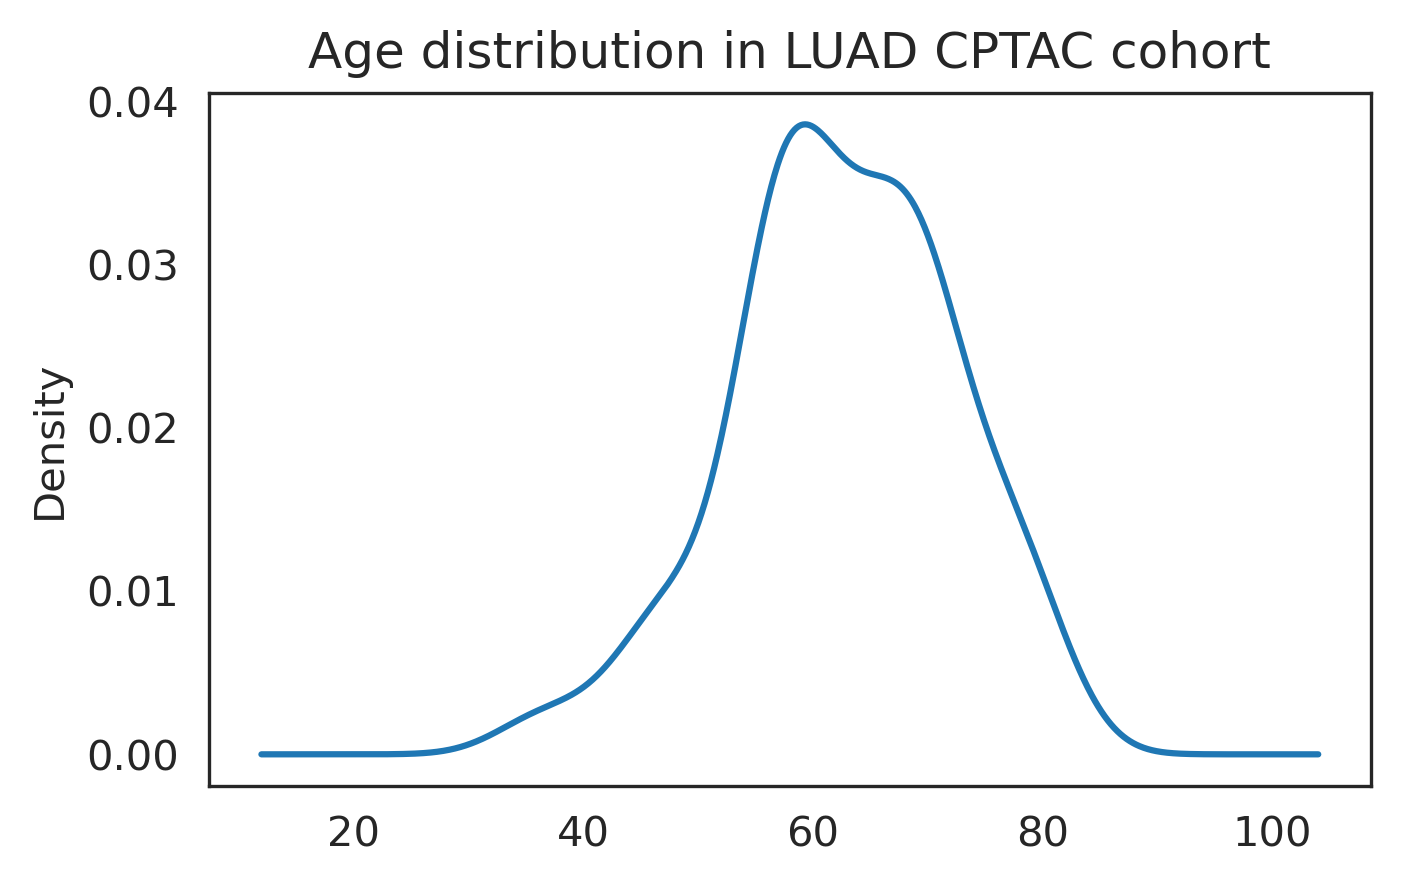

In [8]:
patient_info_df["AGE"].plot(
    kind="kde", figsize=(5, 3), title="Age distribution in LUAD CPTAC cohort"
);

<div class="alert alert-info">
    Several assumptions can be made from the graph, either patients of a certain age were selected in our cohort, or the probability of having oncological diseases increases with age.
    </div>

### Ethnicity & Sex (20 points)

<div class="alert alert-info">
    
***Assess and visualize the ethnic and gender composition represented in a given cohort.***
    </div>

In [90]:
# Ethnicity composition within the cohort
patient_info_df["ETHNICITY"].value_counts()

ETHNICITY
Asian        45
Caucasian    35
Han          18
European      5
Na            3
Hispanic      2
White         1
Black         1
Name: count, dtype: int64

In [91]:
# Sex composition within the cohort
patient_info_df["SEX"].value_counts()

SEX
Male      72
Female    38
Name: count, dtype: int64

In [89]:
# Male composition within the cohort for each ethnicity
patient_info_df.loc[patient_info_df["SEX"] == "Male", "ETHNICITY"].value_counts()

ETHNICITY
Asian        33
Caucasian    22
Han          11
European      3
Hispanic      1
Na            1
White         1
Name: count, dtype: int64

In [92]:
# Female composition within the cohort for each ethnicity
patient_info_df.loc[patient_info_df["SEX"] == "Female", "ETHNICITY"].value_counts()

ETHNICITY
Caucasian    13
Asian        12
Han           7
European      2
Na            2
Hispanic      1
Black         1
Name: count, dtype: int64

**Visualisation**

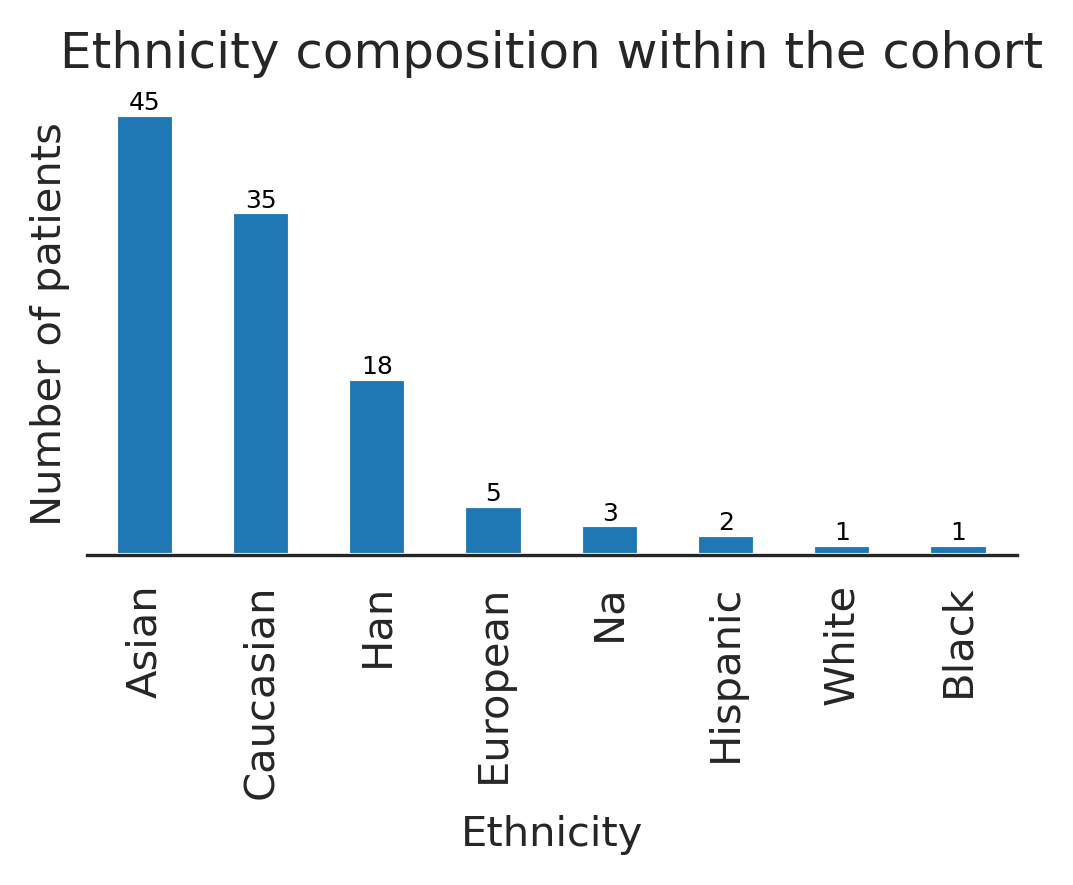

In [70]:
import matplotlib.pyplot as plt

# Получаем данные
ethnicity_counts = patient_info_df["ETHNICITY"].value_counts()

# Создаем фигуру и ось для графика
fig, ax = plt.subplots(figsize=(4, 2))

# Строим столбчатую диаграмму
ethnicity_counts.plot(kind='bar', ax=ax)

# Добавляем заголовок и метки
ax.set_title('Ethnicity composition within the cohort')
ax.set_xlabel('Ethnicity')
ax.set_ylabel('Number of patients')

# Настройка осей
plt.gca().spines['top'].set_visible(False) # сброс границ графика
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Удаляем лейблы с оси y
plt.yticks([])

# Настройка подписей баров
ax.bar_label(ax.containers[0], label_type='edge', color='black', fontsize=6, padding=0, rotation=0)

# Отображаем столбчатую диаграмму
plt.show()

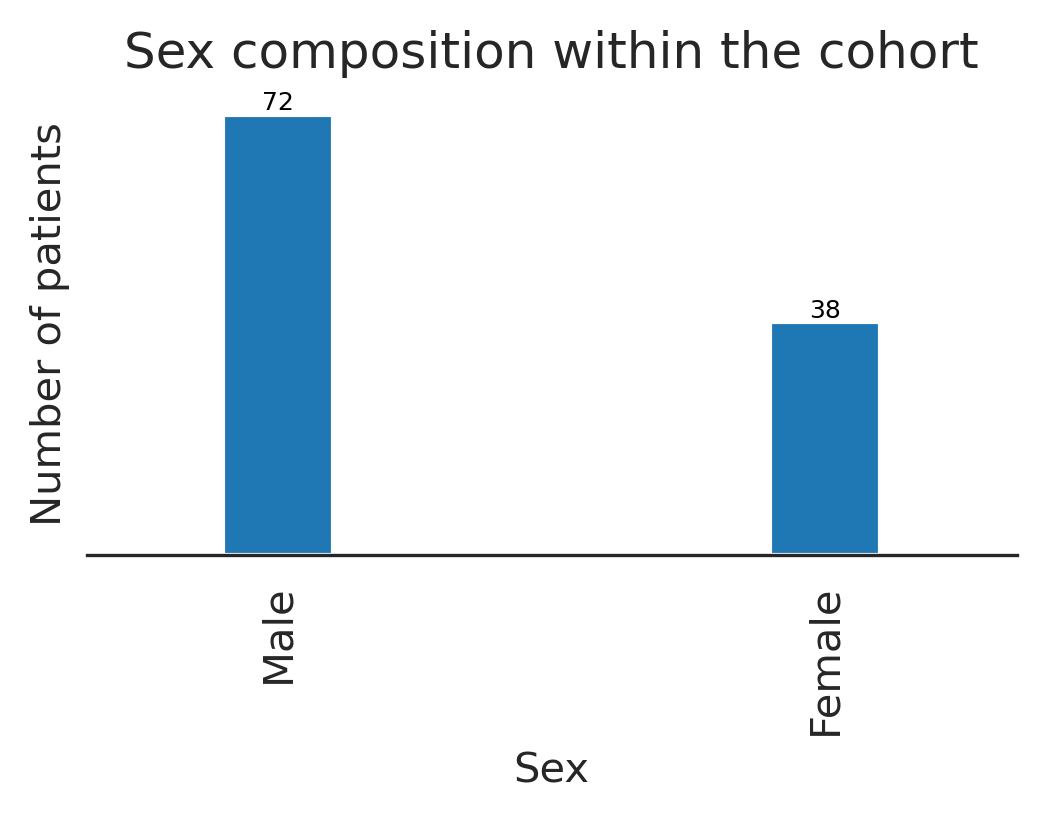

In [80]:
import matplotlib.pyplot as plt

# Получаем данные
ethnicity_counts = patient_info_df["SEX"].value_counts()

# Создаем фигуру и ось для графика
fig, ax = plt.subplots(figsize=(4, 2))

# Строим столбчатую диаграмму
ethnicity_counts.plot(kind='bar', ax=ax, width=0.2)

# Добавляем заголовок и метки
ax.set_title('Sex composition within the cohort')
ax.set_xlabel('Sex')
ax.set_ylabel('Number of patients')

# Настройка осей
plt.gca().spines['top'].set_visible(False) # сброс границ графика
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Удаляем лейблы с оси y
plt.yticks([])

# Настройка подписей баров
ax.bar_label(ax.containers[0], label_type='edge', color='black', fontsize=6, padding=0, rotation=0)

# Отображаем столбчатую диаграмму
plt.show()

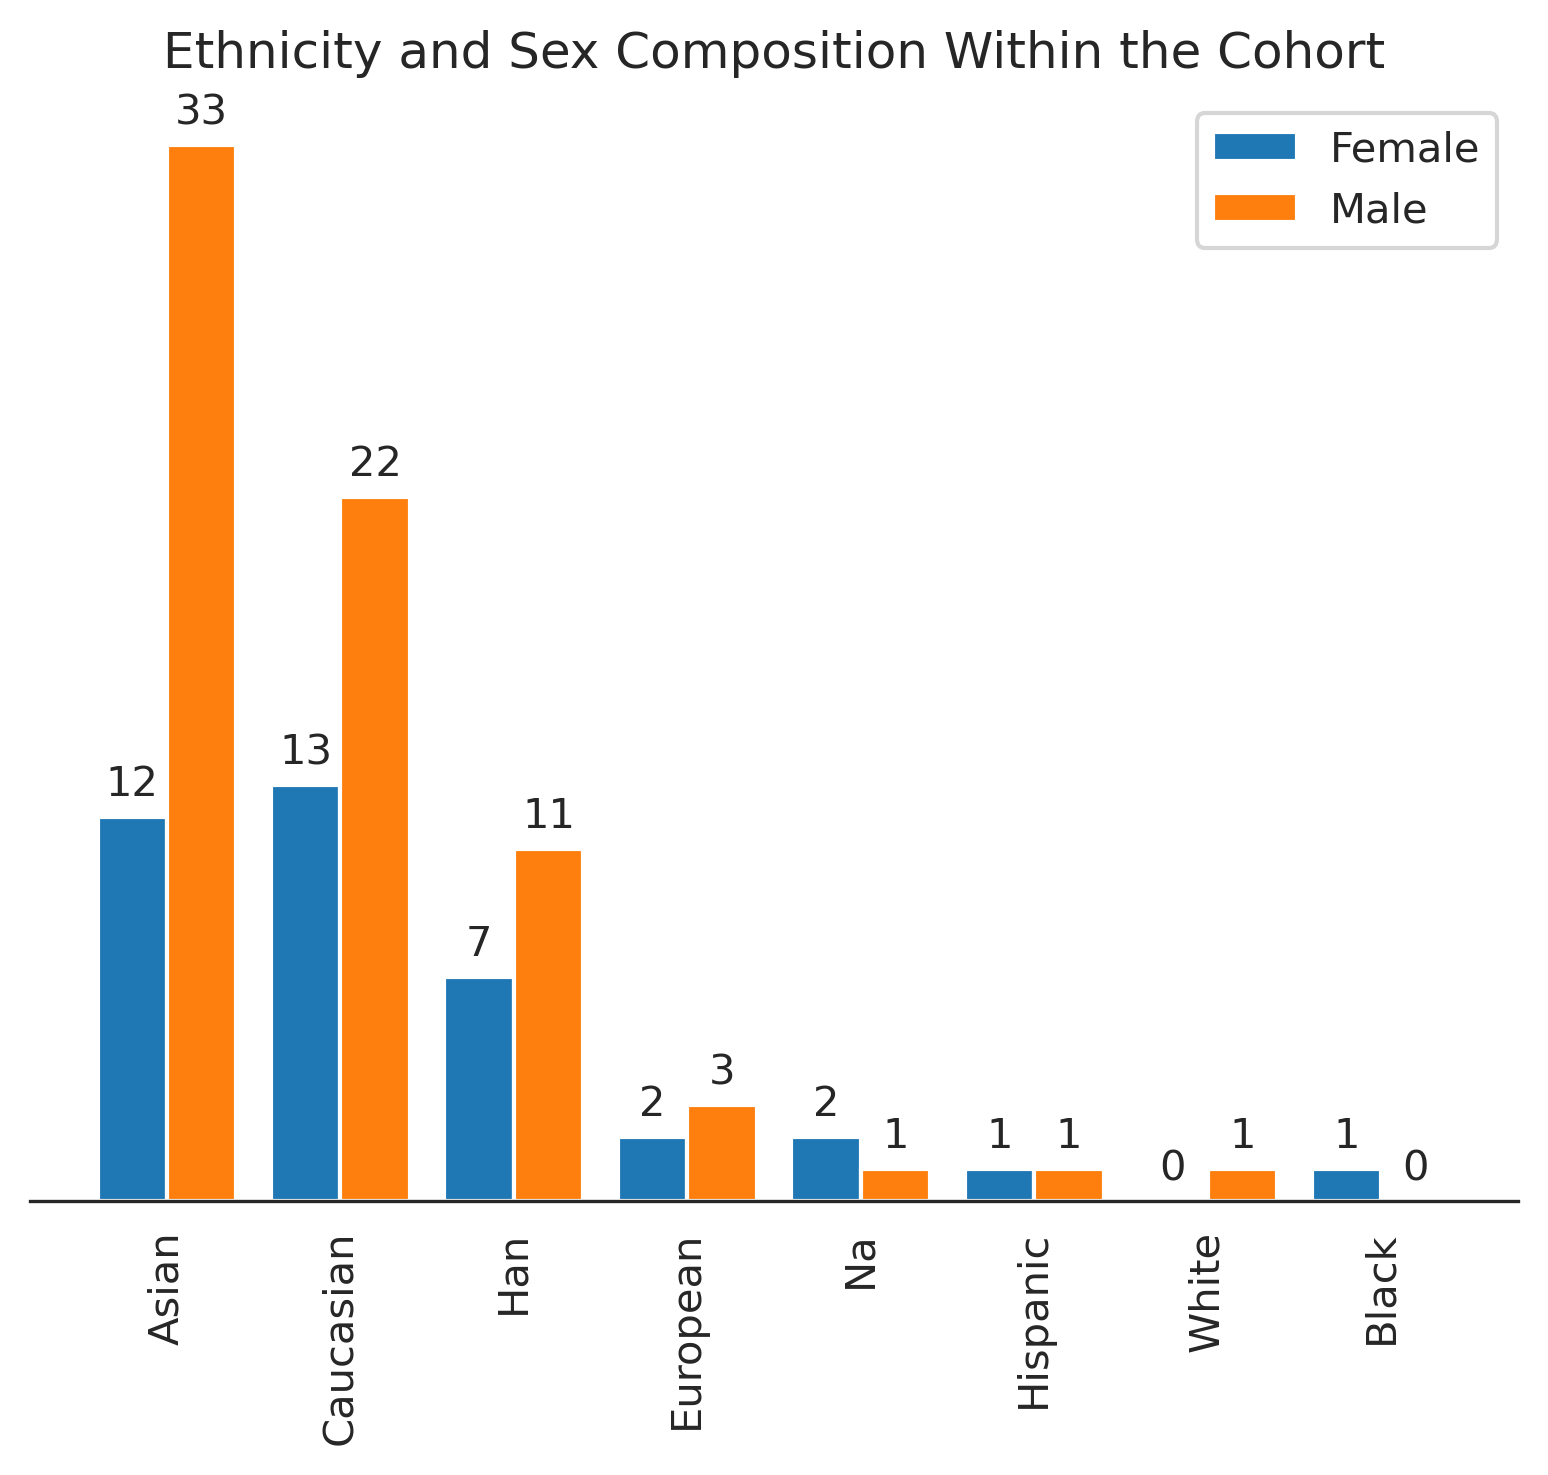

In [81]:
import numpy as np
import matplotlib.pyplot as plt

ethnicity_counts = patient_info_df["ETHNICITY"].value_counts()

# Объединяем уникальные этнические группы
unique_ethnicities = ethnicity_counts.index
x_axis = np.arange(len(unique_ethnicities))

female_ethnicity_counts = patient_info_df.loc[patient_info_df["SEX"] == "Female", "ETHNICITY"].value_counts()
male_ethnicity_counts = patient_info_df.loc[patient_info_df["SEX"] == "Male", "ETHNICITY"].value_counts()

# Создаем бар чарт
bar_female = plt.bar(x_axis - 0.2, [female_ethnicity_counts.get(ethnicity, 0) for ethnicity in unique_ethnicities], width=0.4, label='Female')
bar_male = plt.bar(x_axis + 0.2, [male_ethnicity_counts.get(ethnicity, 0) for ethnicity in unique_ethnicities], width=0.4, label='Male')

# Добавляем заголовок
plt.title('Ethnicity and Sex Composition Within the Cohort')

# Добавляем подписи на оси x
plt.xticks(x_axis, unique_ethnicities, rotation=90)

# Настройка осей
plt.gca().spines['top'].set_visible(False) # сброс границ графика
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Удаляем лейблы с оси y
plt.yticks([])

# Добавляем легенду
plt.legend()

# Добавляем числовые метки
for bar in bar1 + bar2:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords='offset points', ha='center', va='bottom')

# Отображаем бары
plt.show()

In [83]:
mutations_df = pd.read_csv(
    "luad_cptac_2020/data_mutations.txt", sep="\t", index_col=None
)

mutations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31963 entries, 0 to 31962
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Hugo_Symbol                  31963 non-null  object 
 1   NCBI_Build                   31963 non-null  object 
 2   Chromosome                   31963 non-null  object 
 3   Start_Position               31963 non-null  int64  
 4   End_Position                 31963 non-null  int64  
 5   Variant_Classification       31963 non-null  object 
 6   Variant_Type                 31963 non-null  object 
 7   Reference_Allele             31963 non-null  object 
 8   Tumor_Seq_Allele1            31963 non-null  object 
 9   Tumor_Seq_Allele2            31963 non-null  object 
 10  Tumor_Sample_Barcode         31963 non-null  object 
 11  Matched_Norm_Sample_Barcode  0 non-null      float64
 12  Match_Norm_Seq_Allele1       31963 non-null  object 
 13  Match_Norm_Seq_A

<div class="alert alert-info">
    Ech row in this dataset contain information about one specific mutation.

  Crucial columns:

1.   Hugo_Symbol -> gene name
2.   Variant_Classification -> mutation type
3.   HGVSp_Short -> represents the protein change value
4.   t_depth
5.   t_alt_count

More information [here](https://docs.gdc.cancer.gov/Data/File_Formats/MAF_Format/)
    </div>

In [84]:
# number of mutations for each sample
mutations_df.Tumor_Sample_Barcode.value_counts()

Tumor_Sample_Barcode
C3L-00144    1799
C3N-00175    1390
C3N-00560    1367
C3N-00294    1287
C3N-02089    1113
             ... 
C3L-01683      18
C3L-02508      12
C3L-00422      11
C3L-00263       7
C3L-00083       1
Name: count, Length: 109, dtype: int64

### Most mutated gene in this cohort (10 points)



<div class="alert alert-info">
    
***In this task you should find the most mutated gene accros this cohort and describe it functions.*** 

Is it important for cancer development?
    </div>

In [98]:
mutations_df["Hugo_Symbol"].value_counts()

Hugo_Symbol
TTN        92
RYR2       75
MUC16      72
CSMD3      61
USH2A      61
           ..
ABCC6       1
HES3        1
SPANXN4     1
DRC7        1
BUB3        1
Name: count, Length: 11675, dtype: int64

The most mutated gene is TTN.

Mutations in the TTN (Titin) gene are not associated with the development of cancer. The TTN gene encodes a large protein known as titin, which is an important component of muscle and cardiac tissues. Mutations in the titin gene are associated with inherited conditions such as hypertrophic cardiomyopathy and Miyoshi myopathy, a progressive distal muscular dystrophy.


*Больше всего мутаций обнаружено в гене TTN.*

*Мутации в гене TTN (Titin) не связаны с развитием рака. Ген TTN кодирует большой белок, известный как титин, который является важной частью мышечных и сердечных тканей. Мутации в гене титина связаны с наследственной гипертрофической кардиомиопатией и прогрессирующей дистальной мышечной дистрофией Миоша.*

### VAF, Variant Allele Frequency (20 points)

VAF represents the percentage of tumor cells that harbor a specific mutation.

<div class="alert alert-info">
    Which mutation is important? 

Cancer is somewhat like an evolutionary process. Over time, cancer cells accumulate multiple mutations. This process can differ for each clone. So, how we can find truly driver event?

Variant allele frequency (referred to as raw VAF) of gene mutations is defined as the number of variant reads divided by the number of total reads, reported as a percentage.

In addition, VAF help us to distinct technical errors(occurred due to sample handling, library preparation, PCR enrichment, and sequencing) and real mutations.
    </div>

<div class="alert alert-info">
    VAF formula
    </div>

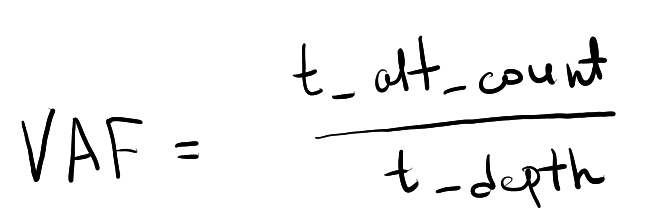

<div class="alert alert-info">

***Estimate VAF for each mutation in mutation_df.***
    </div>

In [109]:
# добавим в наш датафрейм новый столбец со значениями VAF.
mutations_df['VAF'] = mutations_df['t_alt_count'] / mutations_df['t_depth']
mutations_df

,Hugo_Symbol,NCBI_Build,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,...,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,VAF
0,NBPF6,GRCh37,1,108994819,108994819,Silent,SNP,A,A,G,...,ENSG00000186086,ENST00000495380,Transcript,synonymous_variant,399/2494,186/1917,62/638,E,gaA/gaG,0.203390
1,PROK1,GRCh37,1,110996665,110996665,Missense_Mutation,SNP,C,C,T,...,ENSG00000143125,ENST00000271331,Transcript,missense_variant,172/1338,155/318,52/105,P/L,cCg/cTg,0.087774
2,UBAP2L,GRCh37,1,154201197,154201197,Missense_Mutation,SNP,A,A,G,...,ENSG00000143569,ENST00000428931,Transcript,missense_variant,442/3988,275/3264,92/1087,D/G,gAc/gGc,0.246032
3,PEAR1,GRCh37,1,156875154,156875154,Missense_Mutation,SNP,C,C,T,...,ENSG00000187800,ENST00000338302,Transcript,missense_variant,470/4970,245/3114,82/1037,T/M,aCg/aTg,0.093264
4,LMX1A,GRCh37,1,165182966,165182966,Missense_Mutation,SNP,C,C,T,...,ENSG00000162761,ENST00000342310,Transcript,missense_variant,964/3545,581/1149,194/382,R/H,cGc/cAc,0.141463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31958,STK11,GRCh37,19,1207104,1207105,Nonsense_Mutation,MNP,GG,TT,TT,...,ENSG00000118046,ENST00000326873,Transcript,stop_gained,643/2611,193/1302,65/433,E/*,Gag/Tag,0.148241
31959,DCAF10,GRCh37,9,37861181,37861182,Missense_Mutation,MNP,TG,GA,GA,...,ENSG00000122741,ENST00000377724,Transcript,missense_variant,1722/3862,1357/1680,453/559,V/I,Gtc/Atc,0.226415
31960,DCAF10,GRCh37,9,37861181,37861182,Missense_Mutation,MNP,TG,GA,GA,...,ENSG00000122741,ENST00000377724,Transcript,missense_variant,1722/3862,1357/1680,453/559,V/I,Gtc/Atc,0.226415
31961,NR0B1,GRCh37,X,30326907,30326908,Missense_Mutation,MNP,CC,AT,AT,...,ENSG00000169297,ENST00000378970,Transcript,synonymous_variant,808/2021,573/1413,191/470,R,cgG/cgA,0.141538


### VAF filtration (10 points)

<div class="alert alert-info">
    
***Fillter all mutations with VAF < 0.5.*** 

Which gene are most mutated now? 
</div>

In [117]:
mutations_df.query("VAF < 0.5")["Hugo_Symbol"].value_counts()

Hugo_Symbol
TTN         92
RYR2        73
MUC16       67
USH2A       61
CSMD3       59
            ..
FBXO44       1
ZNF843       1
PA2G4        1
USP20        1
C6orf201     1
Name: count, Length: 11530, dtype: int64

The most mutated gene is TTN.

*Больше всего мутаций обнаружено в гене TTN.*

# Patient (30 points)

<div class="alert alert-info">
Let's analyze one patient -> **C3N-02572**.

**You'll need to find mutations in oncogenes ot tumor supressor genes. And think about what it can mean and what to influence.**
    </div>

In [131]:
mutations_df.query("Tumor_Sample_Barcode == 'C3N-02572'")[["Hugo_Symbol", "Variant_Classification"]]

,Hugo_Symbol,Variant_Classification
18344,SLC35E2B,Missense_Mutation
18345,ERICH3,Missense_Mutation
18346,HMCN1,Missense_Mutation
18347,CHRM3,Missense_Mutation
18348,ROCK2,Nonsense_Mutation
18349,ESPNL,Missense_Mutation
18350,LRRIQ4,Missense_Mutation
18351,C4orf50,Missense_Mutation
18352,TMPRSS11B,Missense_Mutation
18353,TMPRSS11B,Missense_Mutation


In [132]:
import mygene
mg = mygene.MyGeneInfo()
q = mg.querymany(qterms=['SLC35E2B'], scopes="symbol", species='human', as_dataframe=True, df_index=True, fields='all')
cols=['symbol',
      'name',
      'alias', 
      'map_location',
      'type_of_gene',
      'summary',
      'generif'
      ]
q[cols]

INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.


,symbol,name,alias,map_location,type_of_gene,summary,generif
query,,,,,,,
SLC35E2B,SLC35E2B,solute carrier family 35 member E2B,SLC35E2,1p36.33,protein-coding,Predicted to enable antiporter activity. Predi...,"[{'pubmed': 33711669, 'text': 'Variants in FLR..."


In [138]:
import mygene
import pandas as pd

# Создайте список уникальных Hugo_Symbol из вашего DataFrame
symbols = mutations_df.query("Tumor_Sample_Barcode == 'C3N-02572'")["Hugo_Symbol"].unique()

# Инициализируйте mygene
mg = mygene.MyGeneInfo()

# Создайте пустой DataFrame для результатов
result_df = pd.DataFrame()

# Запросите информацию для каждого символа
for symbol in symbols:
    q = mg.querymany(qterms=[symbol], scopes="symbol", species='human', as_dataframe=True, df_index=True, fields='all')
    if not q.empty:
        # Переиндексируйте DataFrame q, чтобы выровнять его с требуемыми столбцами
        q = q.reindex(columns=cols)
        result_df = pd.concat([result_df, q], axis=0)

INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.
INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.
INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.
INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.
INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.
INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.
INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.
INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.
INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.
INFO:biothings.client:querying 1-1...
INFO:biothings.client:done.
INFO:biothings.client:Finished.
INFO:biothings.clien

In [141]:
result_df

,symbol,name,alias,map_location,type_of_gene,summary,generif
query,,,,,,,
SLC35E2B,SLC35E2B,solute carrier family 35 member E2B,SLC35E2,1p36.33,protein-coding,Predicted to enable antiporter activity. Predi...,"[{'pubmed': 33711669, 'text': 'Variants in FLR..."
ERICH3,ERICH3,glutamate rich 3,C1orf173,1p31.1,protein-coding,NaN,"[{'pubmed': 20379614, 'text': 'Clinical trial ..."
HMCN1,HMCN1,hemicentin 1,"[ARMD1, FBLN6, FIBL-6, FIBL6]",1q25.3-q31.1,protein-coding,This gene encodes a large extracellular member...,"[{'pubmed': 14570714, 'text': 'We mapped the A..."
CHRM3,CHRM3,cholinergic receptor muscarinic 3,"[EGBRS, HM3, PBS, m3AChR]",1q43,protein-coding,The muscarinic cholinergic receptors belong to...,"[{'pubmed': 11856737, 'text': 'potential role ..."
ROCK2,ROCK2,Rho associated coiled-coil containing protein ...,ROCK-II,2p25.1,protein-coding,The protein encoded by this gene is a serine/t...,"[{'pubmed': 12102637, 'text': 'Kinetic mechani..."
ESPNL,ESPNL,espin like,NaN,2q37.3,protein-coding,Predicted to enable actin filament binding act...,NaN
LRRIQ4,LRRIQ4,leucine rich repeats and IQ motif containing 4,LRRC64,3q26.2,protein-coding,Predicted to enable protein serine/threonine p...,NaN
C4orf50,C4orf50,chromosome 4 open reading frame 50,NaN,4p16.2-p16.1,protein-coding,NaN,"[{'pubmed': 20379614, 'text': 'Clinical trial ..."
TMPRSS11B,TMPRSS11B,transmembrane serine protease 11B,HATL5,4q13.2,protein-coding,Enables serine-type peptidase activity. Predic...,"[{'pubmed': 17975119, 'text': 'Observational s..."
